In [2]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import bugv
import pysam
import pandas as pd
import seaborn as sns

In [5]:
def generate_long_read_config(color="#3183bd", track_height=1, select_read_types="polya"):
    if select_read_types == "polya_contain_5lost":
        select_read_types = ["polya_3_not_in_last_exon", "polya_5lost", "polya"]
    config={
            #"track_height": 3,
            "feature_plot.feature_space": 0,
            "feature_plot.select_read_types": select_read_types, #["polya_3_not_in_last_exon", "polya_5lost", "polya"], #["polya"], #
            "feature_plot.read_type_order": [[["elongating", "splicing_intermediate", "elongating_3_mapping_low_accuracy","elongating_5lost" ], "elongating"],
                                             [["polya_3_not_in_last_exon", "polya_5lost", "polya"], "polya"],
                                            ],
            "feature_plot.read_type_sort_method": {"polya": "start_end"},
            "feature_plot.polyA.plot_show": True,
            "feature_plot.exon.facecolor": color,
            "feature_plot.exon.edgecolor": color,
           }
    return config


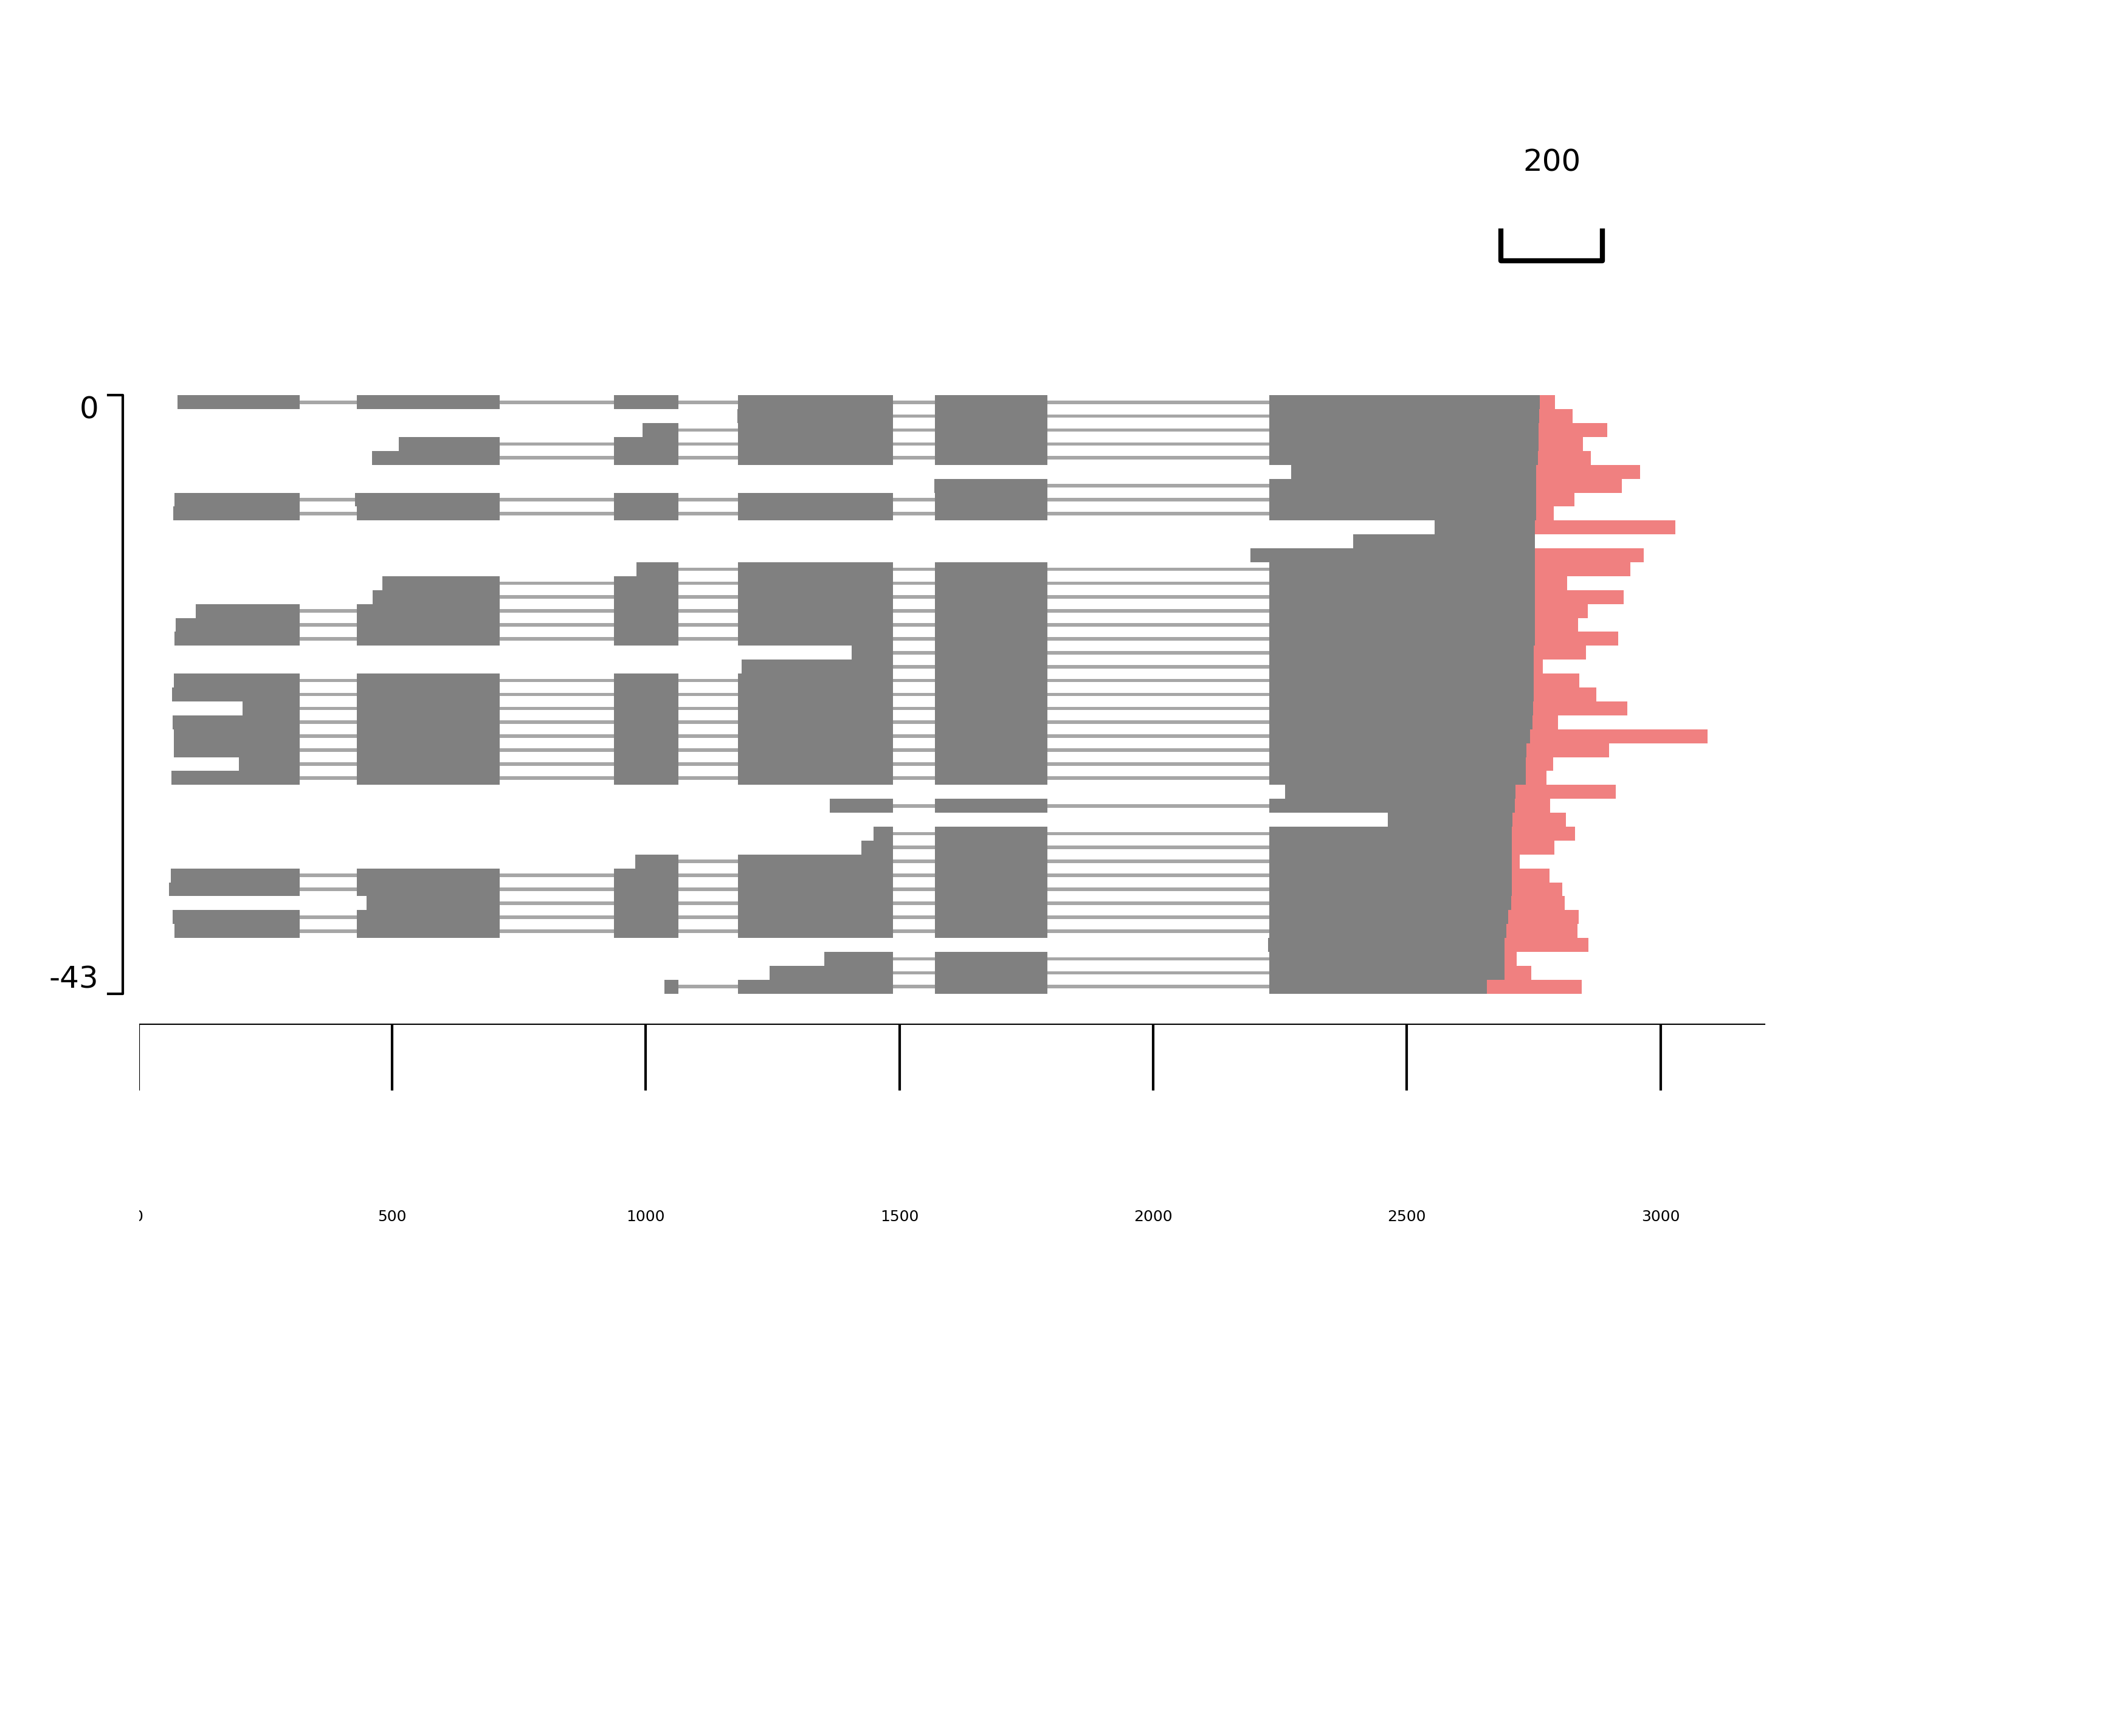

In [11]:
bgv = bugv.BuGV()
file_ddm1_bam = './tmp_gene_bam/ddm1_AT2G13160.bam'
select_read_types='polya'
bgv.add_track("RulerTrack", config={"track_height": 0.5, "ruler.ruler_length": 200})
#bgv.add_track("XaxisGeneTrack", config={"track_height": 1})
#bgv.add_track("BedTrack", file_name = bed_file, config = {"track_height": 1})
bgv.add_track(
        "FulllengthBamTrack",
        file_name=file_ddm1_bam,
        track_name="ddm1-L2",
        config=generate_long_read_config(color='grey', track_height=1000, select_read_types=select_read_types)
    )
bgv.add_track("SpaceTrack", config={"track_height": 0})
bgv.add_track("XaxisGeneTrack", config={"track_height": 1})
bgv.plot(region=["Chr2", 5441450, 5444655, "+"], select_features=None, dpi=600)
#bgv.fig.savefig("ddm1_AT2G13160.eps")
plt.show()

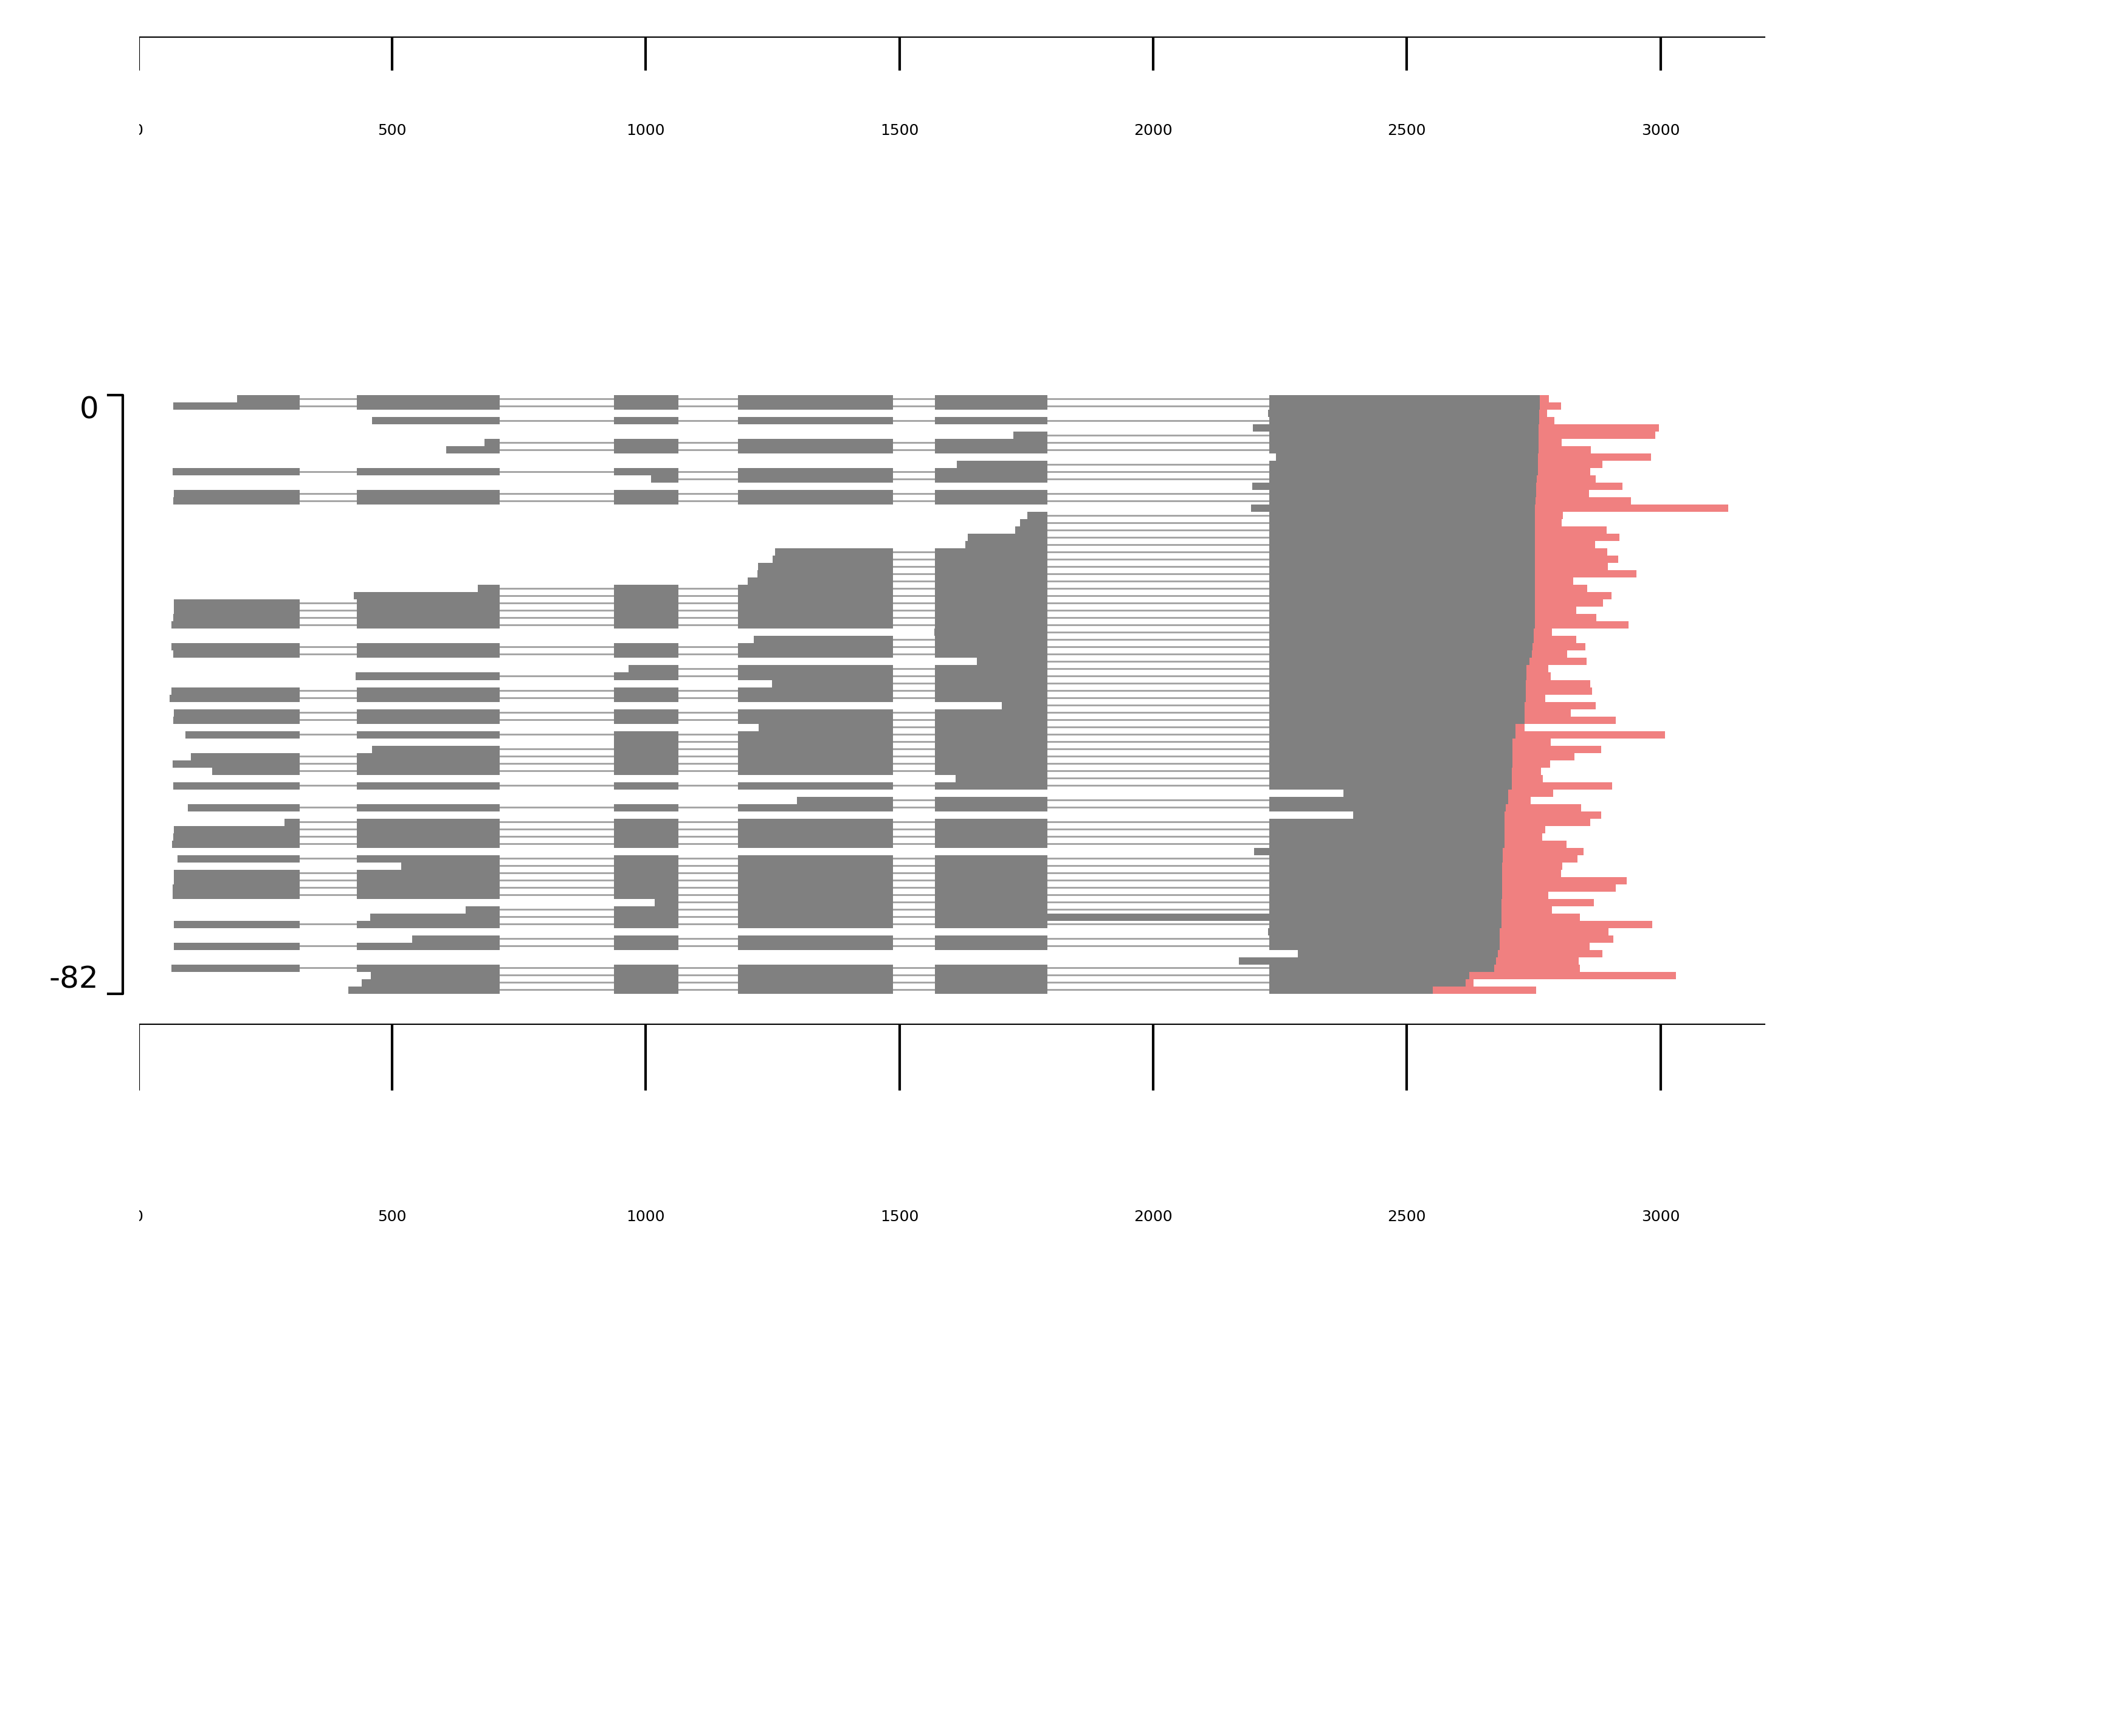

In [10]:
bgv = bugv.BuGV()
file_ccr4a_bam = './tmp_gene_bam/ccr4a_AT2G13160.bam'
select_read_types='polya'
#bgv.add_track("XaxisGeneTrack", config={"track_height": 0.5})
bgv.add_track(
        "FulllengthBamTrack",
        file_name=file_ccr4a_bam,
        track_name="ccr4a-1 ddm1-L2",
        config=generate_long_read_config(color='grey', track_height=1, select_read_types=select_read_types)
    )
bgv.add_track("SpaceTrack", config={"track_height": 0})
bgv.add_track("XaxisGeneTrack", config={"track_height": 1})
bgv.plot(region=["Chr2", 5441450, 5444655, "+"], select_features=None, dpi=600)
#bgv.fig.savefig("ccr4a_AT2G13160.eps")
plt.show()